# Nagłówek 1-6


**Pogrubiony tekst**
*Tekst kursywą*
~~Przekreślony tekst~~
***pogrubiona kursywa***

> To jest cytat.
>> Cytat zagnieżdżony.

| Kolumna 1 | Kolumna 2 | Kolumna 3 |
|-----------|-----------|-----------|
| Wartość 1 | Wartość 2 | Wartość 3 |
| Wartość 4 | Wartość 5 | Wartość 6 |




# Wstępne przetwarzanie danych


### Wczytanie danych i informacje o nich

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('data/HCV-Egy-Data.csv')
    # 1385 rows x 29 columns
    # RBC, PLAT, AL4 - format jako float64
    # reszta jako int64

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

### Usuniecie duplikatów
*brak duplikatów*

In [15]:
num_duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f'Liczba usuniętych duplikatów: {num_duplicates}')
print(f'Po usunięciu duplikatów: {data.shape}')

Liczba usuniętych duplikatów: 0
Po usunięciu duplikatów: (1385, 29)


### Sprawdzenie brakującyh wartości
*brak brakujacych wartosci*

In [16]:
print(data.isnull().sum())

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

### Obsługa outlinerow

#### Sprawdzenie czy dane są poprawnie odczytywane
##### *( ! ) nelzelao usunac biale znaki znazwykolumn*

In [ ]:
continuous_features = ['Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'RNA Base']

In [33]:
# Sprawdzenie, które kolumny istnieją w zbiorze danych
existing_features = [feature for feature in continuous_features if feature in data.columns]
missing_features = [feature for feature in continuous_features if feature not in data.columns]

In [34]:
if missing_features:
    print(f"Ostrzeżenie: Następujące kolumny nie zostały znalezione w zbiorze danych i zostaną pominięte: {missing_features}")

#### Identyfiakcja outlinerów za pomocą wykresów pudełkowych
*brak outlinerów*

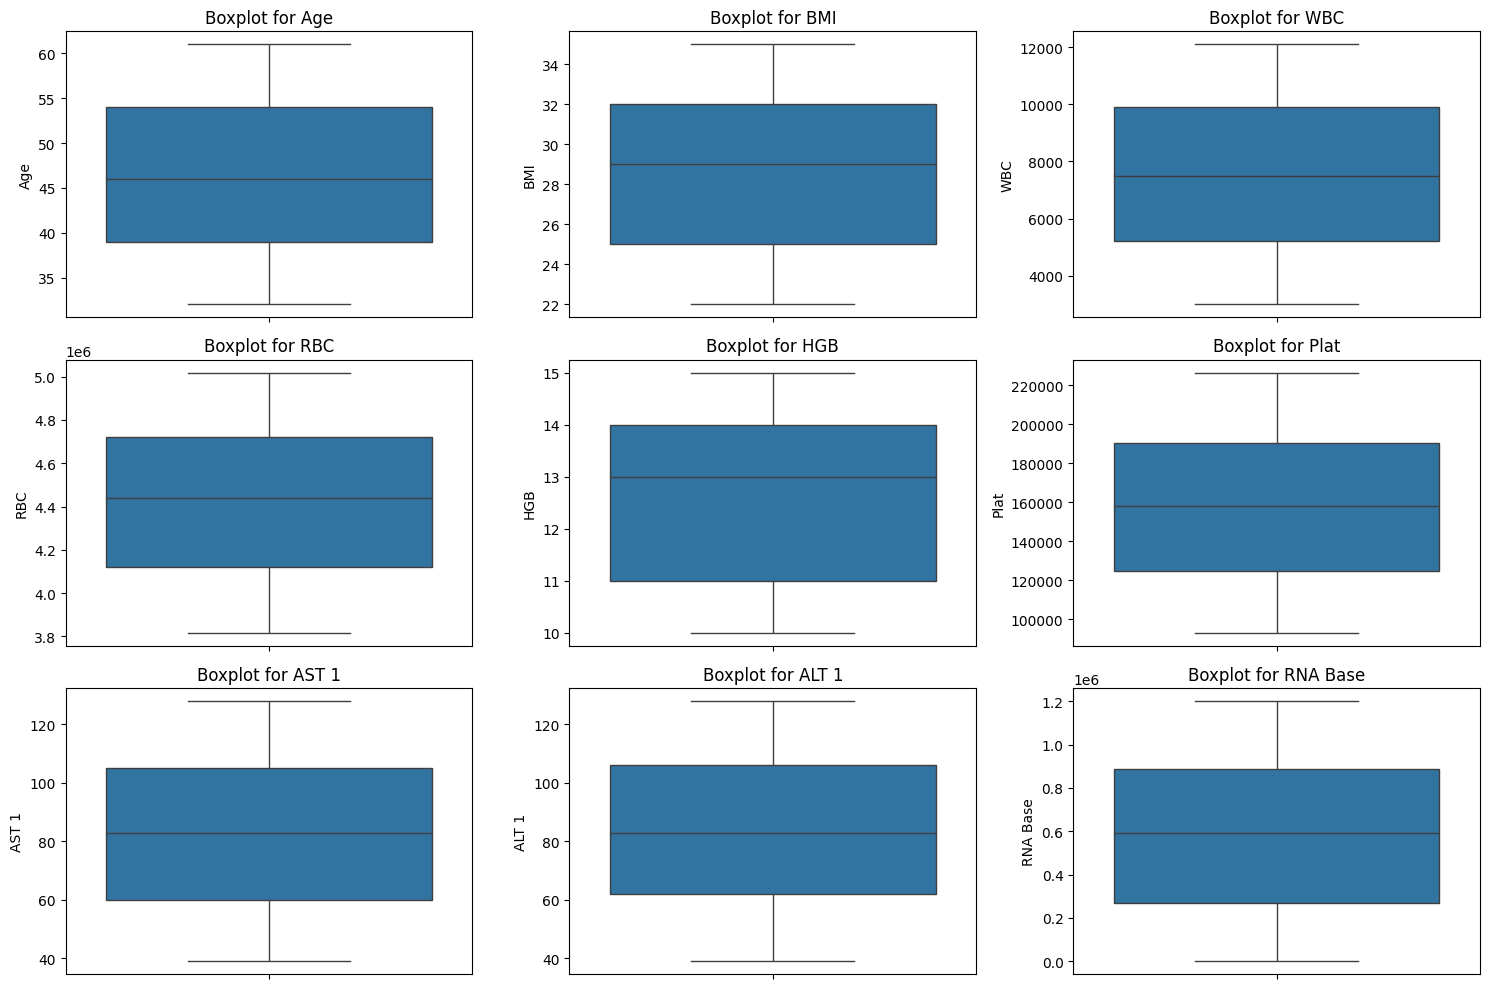

In [35]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Podsumowanie po czyszczeniu danych
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

##### Identyfikacja outlinerów dla pozostałych cech ciągłych

Sprawdzanie outlierów dla pozostałych cech ciągłych: ['ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']


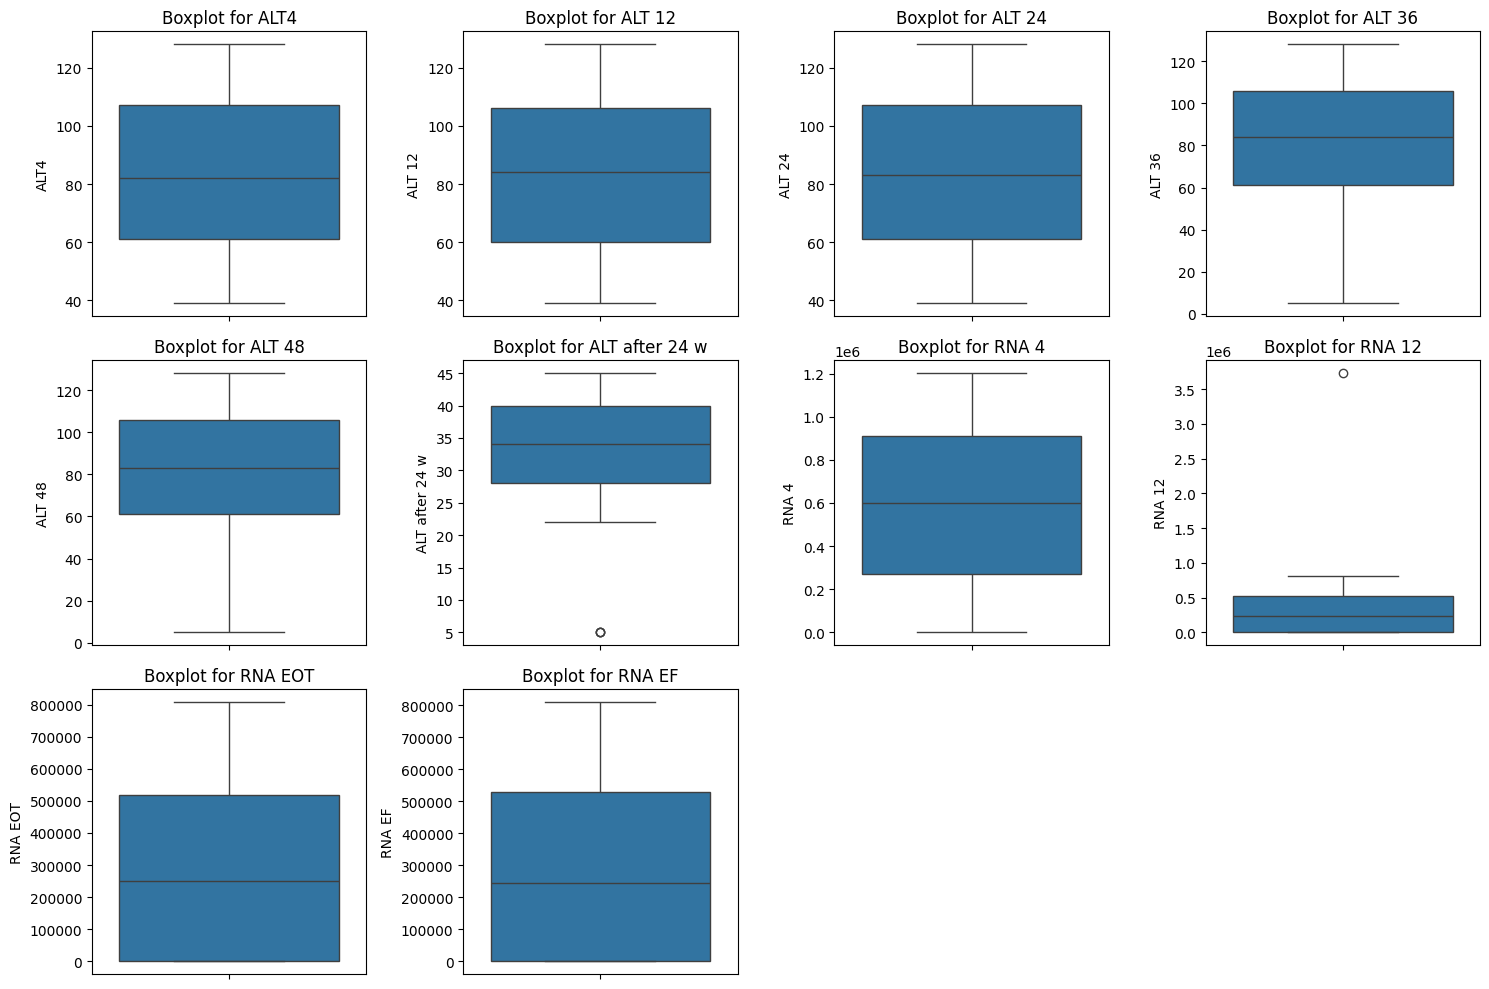

In [48]:
remaining_features = ['ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA 4','RNA 12','RNA EOT','RNA EF']

if remaining_features:
    print(f"Sprawdzanie outlierów dla pozostałych cech ciągłych: {remaining_features}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(remaining_features, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

##### Usuwanie outlierów za pomocą metody IQR (Interquartile Range) dla 'ALT 24 after w' oraz 'RNA 12'
###### 4 wiersze suunieta

In [49]:
features_to_remove_outliers = ['ALT after 24 w', 'RNA 12']
for feature in features_to_remove_outliers:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrowanie danych, usuwanie outlierów
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

print(f'Po usunięciu outlierów: {data.shape}')


Po usunięciu outlierów: (1381, 29)


Sprawdzanie czy outlierów zostały usunięte: ['ALT after 24 w', 'RNA 12']


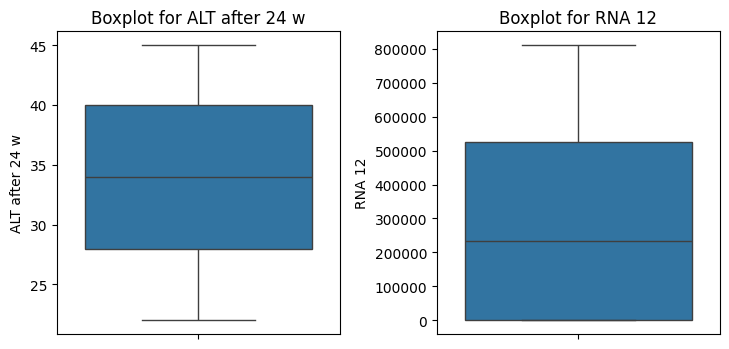

In [53]:
if features_to_remove_outliers:
    print(f"Sprawdzanie czy outlierów zostały usunięte: {features_to_remove_outliers}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features_to_remove_outliers, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

##### Podsumowanie i zapis oczyszczonych danych

In [ ]:
# Podsumowanie po czyszczeniu danych
# print(data.info())
# print(data.describe())

# Zapisz oczyszczony zbior danych do nowego pliku
# data.to_csv('cleaned_database.csv', index=False)
